In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import tensorflow
from tensorflow.keras import layers, models, losses, optimizers

2024-03-22 15:01:57.050775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 15:01:57.050881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 15:01:57.335323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
mnist_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [4]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [5]:
train_images = mnist_train.iloc[:, 1:]
train_labels = mnist_train.iloc[:, 0]
test_images = mnist_test.iloc[:, 1:]
test_labels = mnist_test.iloc[:, 0]

In [6]:
train_images.shape, train_labels.shape

((60000, 784), (60000,))

In [7]:
test_images.shape, test_labels.shape

((10000, 784), (10000,))

In [8]:
train_images.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [10]:
test_images.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_labels.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [12]:
train_images.loc[0], train_labels.loc[0]

(1x1      0
 1x2      0
 1x3      0
 1x4      0
 1x5      0
         ..
 28x24    0
 28x25    0
 28x26    0
 28x27    0
 28x28    0
 Name: 0, Length: 784, dtype: int64,
 5)

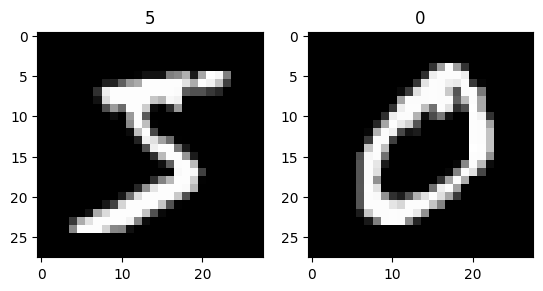

In [13]:
# Visualize the first and second images
plt.subplot(1, 2, 1)  # Subplot 1
plt.imshow(train_images.loc[0].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[0]}')

plt.subplot(1, 2, 2)  # Subplot 2
plt.imshow(train_images.loc[1].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[1]}')

plt.show()

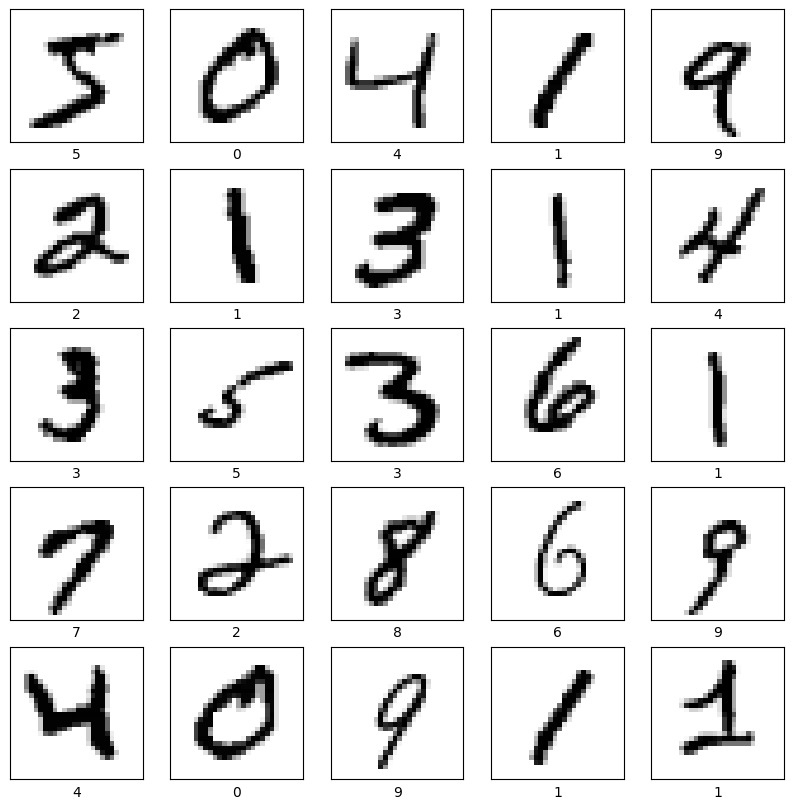

In [14]:
# Sample images visualization
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images.values[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels.values[i])
plt.show()

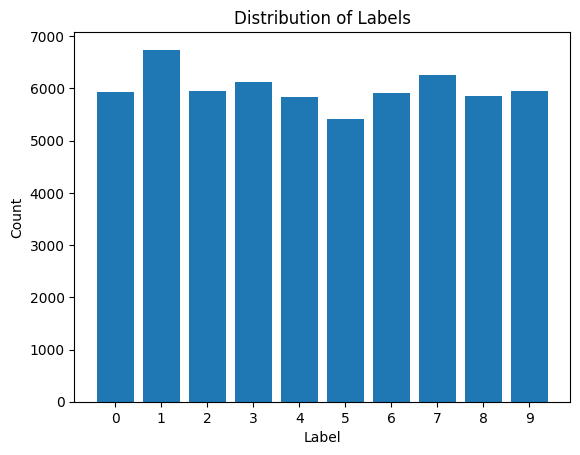

In [15]:
# Distribution of labels
plt.hist(train_labels, bins=range(11), rwidth=0.8, align='left')
plt.xticks(range(10))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [16]:
# Statistics
print("Minimum pixel value:", np.min(train_images.values))
print("Maximum pixel value:", np.max(train_images.values))
print("Mean pixel value:", np.mean(train_images.values))
print("Standard deviation of pixel values:", np.std(train_images.values))

Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.318421449829934
Standard deviation of pixel values: 78.56748998339742


In [17]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [18]:
# Add a channel dimension
train_images = train_images.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)

In [19]:
# Create TensorFlow datasets
train_ds = tensorflow.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(64)
test_ds = tensorflow.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [20]:
# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [21]:
# Compile the model
model.compile(optimizer='Adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(train_ds, epochs=25)

Epoch 1/25
 65/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5498 - loss: 1.4167

I0000 00:00:1711119750.787164      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711119750.806094      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8884 - loss: 0.3649
Epoch 2/25
 67/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9826 - loss: 0.0646

W0000 00:00:1711119754.669359      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9838 - loss: 0.0539
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9899 - loss: 0.0339
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9925 - loss: 0.0242
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0179
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9949 - loss: 0.0149
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9962 - loss: 0.0111
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9971 - loss: 0.0089
Epoch 9/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0085
Epoch 10/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0083
Epoch 11/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0054
Epoch 12/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9978 - loss: 0.0060
Epoch 13/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accurac

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

W0000 00:00:1711119811.253766      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 - 2s - 10ms/step - accuracy: 0.9909 - loss: 0.0411

Test accuracy: 0.9908999800682068


W0000 00:00:1711119812.255272      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


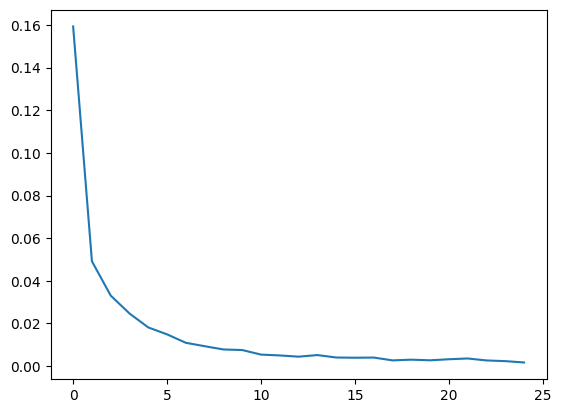

In [24]:
plt.plot(history.history['loss'])

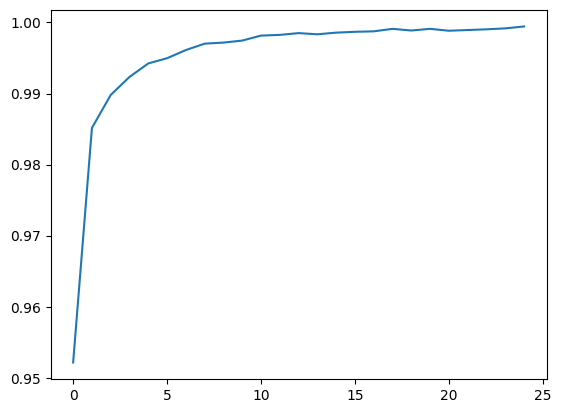

In [25]:
plt.plot(history.history['accuracy'])

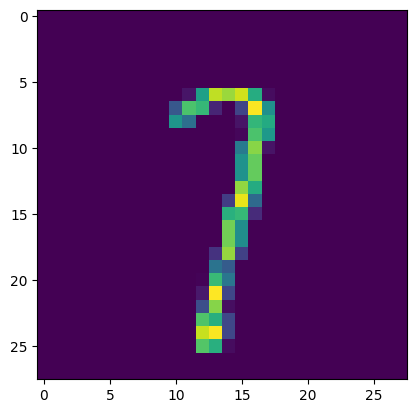

In [26]:
plt.imshow(test_images.reshape(-1, 28, 28)[175])

In [27]:
model.predict(test_images[175].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step


array([7])

In [28]:
# Concatenate train_images and train_labels
X = train_images.reshape(-1, 28, 28, 1)  # Reshape for Conv2D input
y = train_labels

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
accuracies = []
losses = []

# Iterate over each fold
for train_index, val_index in skf.split(X, y):
    # Split data into train and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Define the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation set
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)

    # Append validation accuracy and loss to lists
    accuracies.append(val_acc)
    losses.append(val_loss)

# Calculate mean accuracy and loss
mean_accuracy = np.mean(accuracies)
mean_loss = np.mean(losses)

print("Mean Accuracy:", mean_accuracy)
print("Mean Loss:", mean_loss)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
W0000 00:00:1711119818.359331      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711119822.430497      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
W0000 00:00:1711119841.807371      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711119845.735345      73 gra

Mean Accuracy: 0.9881166696548462
Mean Loss: 0.043674010783433914
